In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("tested.csv")

df['Age'] = df['Age'].fillna(df['Age'].median())
df['Fare'] = df['Fare'].fillna(df['Fare'].median())
#take frequent val
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Cabin_known'] = df['Cabin'].notna().astype(int)

df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
df['Title'] = df['Title'].replace(['Mlle','Ms'],'Miss').replace('Mme','Mrs')
#collect rare vals
rare_titles = df['Title'].value_counts()[df['Title'].value_counts() < 10].index
df['Title'] = df['Title'].replace(rare_titles, 'Rare')





In [6]:

print(df.describe())
print(df.groupby('Sex')['Survived'].mean())
print(df.groupby('Pclass')['Survived'].mean())
print(df.groupby('Embarked')['Survived'].mean())
print(df.groupby('IsAlone')['Survived'].mean())
print(df.groupby('Title')['Survived'].mean())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   418.000000  418.000000  418.000000  418.000000  418.000000   
mean   1100.500000    0.363636    2.265550   29.599282    0.447368   
std     120.810458    0.481622    0.841838   12.703770    0.896760   
min     892.000000    0.000000    1.000000    0.170000    0.000000   
25%     996.250000    0.000000    1.000000   23.000000    0.000000   
50%    1100.500000    0.000000    3.000000   27.000000    0.000000   
75%    1204.750000    1.000000    3.000000   35.750000    1.000000   
max    1309.000000    1.000000    3.000000   76.000000    8.000000   

            Parch        Fare  Cabin_known  FamilySize     IsAlone  
count  418.000000  418.000000   418.000000  418.000000  418.000000  
mean     0.392344   35.576535     0.217703    1.839713    0.605263  
std      0.981429   55.850103     0.413179    1.519072    0.489380  
min      0.000000    0.000000     0.000000    1.000000    0.000000  
25%      0.000000    7.8

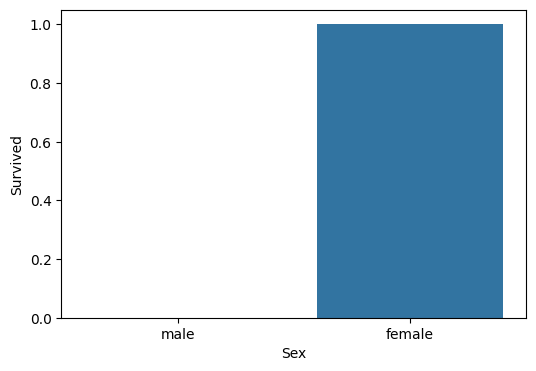

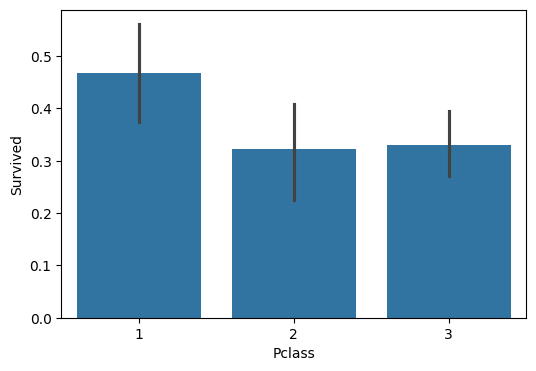

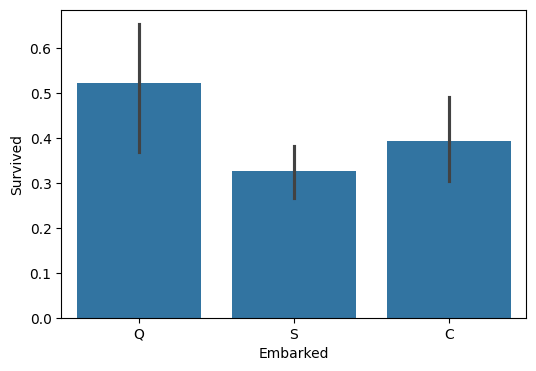

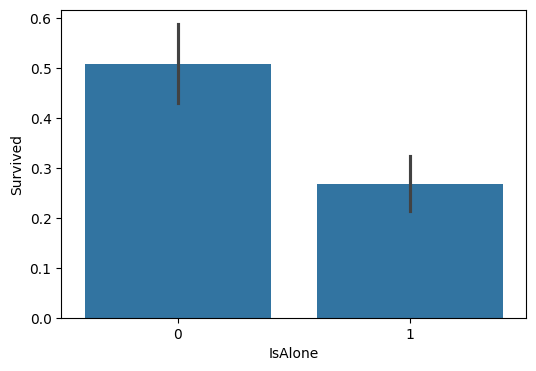

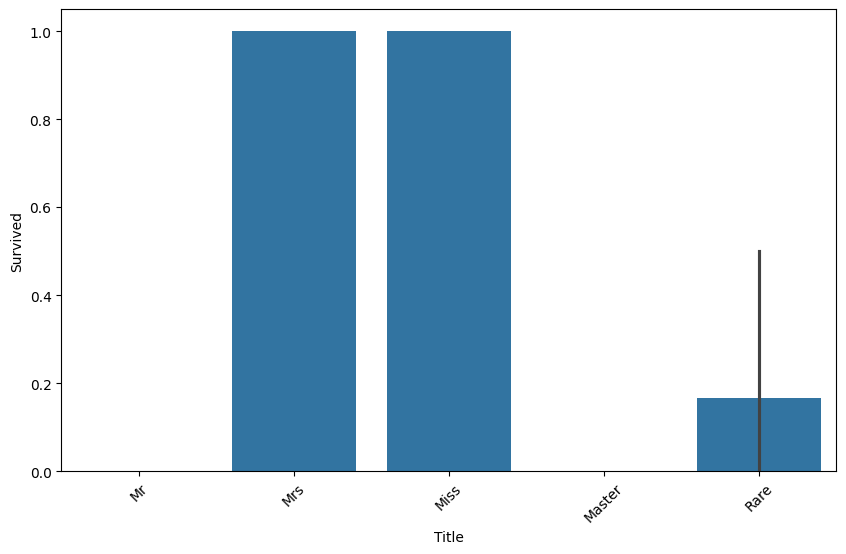

In [7]:
plt.figure(figsize=(6,4))
sns.barplot(x='Sex', y='Survived', data=df)
plt.show()

plt.figure(figsize=(6,4))
sns.barplot(x='Pclass', y='Survived', data=df)
plt.show()

plt.figure(figsize=(6,4))
sns.barplot(x='Embarked', y='Survived', data=df)
plt.show()

plt.figure(figsize=(6,4))
sns.barplot(x='IsAlone', y='Survived', data=df)
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(x='Title', y='Survived', data=df)
plt.xticks(rotation=45)
plt.show()